In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [ ]:
data = pd.read_csv("balancedtask1.csv")

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokens1 = []
for text in data["chat1"]:
  tokens1.append(tokenizer.tokenize(text))

tokens2 = []
for text in data["chat2"]:
  tokens2.append(tokenizer.tokenize(text))

In [ ]:
token_ids1 = []
for token in tokens1:
  token_ids1.append(tokenizer.convert_tokens_to_ids(token))

token_ids2 = []
for token in tokens2:
  token_ids2.append(tokenizer.convert_tokens_to_ids(token))

In [ ]:
maxlen = 100
padded_sequences1 = pad_sequences(token_ids1, maxlen=maxlen)

maxlen = 100
padded_sequences2 = pad_sequences(token_ids2, maxlen=maxlen)

In [ ]:
labels = pd.get_dummies(data["label"]).values

In [ ]:
padd = np.concatenate([padded_sequences1, padded_sequences2], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padd, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(2 * (tokenizer.vocab_size + 1), 128, input_length=2*(maxlen)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
44/44 [==============================] - 16s 254ms/step - loss: 0.6936 - accuracy: 0.5007 - val_loss: 0.6905 - val_accuracy: 0.5256
Epoch 2/10
44/44 [==============================] - 8s 189ms/step - loss: 0.5036 - accuracy: 0.8402 - val_loss: 0.7980 - val_accuracy: 0.5426
Epoch 3/10
44/44 [==============================] - 8s 186ms/step - loss: 0.0849 - accuracy: 0.9723 - val_loss: 1.1172 - val_accuracy: 0.5795
Epoch 4/10
44/44 [==============================] - 7s 163ms/step - loss: 0.0164 - accuracy: 0.9972 - val_loss: 1.2813 - val_accuracy: 0.6023
Epoch 5/10
44/44 [==============================] - 8s 172ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.4763 - val_accuracy: 0.5909
Epoch 6/10
44/44 [==============================] - 7s 153ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.5781 - val_accuracy: 0.5881
Epoch 7/10
44/44 [==============================] - 7s 146ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5971 - val_accuracy: 0.5710
Epoch

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

14/14 [==============================] - 1s 17ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57       213
           1       0.57      0.48      0.52       227

    accuracy                           0.55       440
   macro avg       0.55      0.55      0.54       440
weighted avg       0.55      0.55      0.54       440

[[130  83]
 [117 110]]


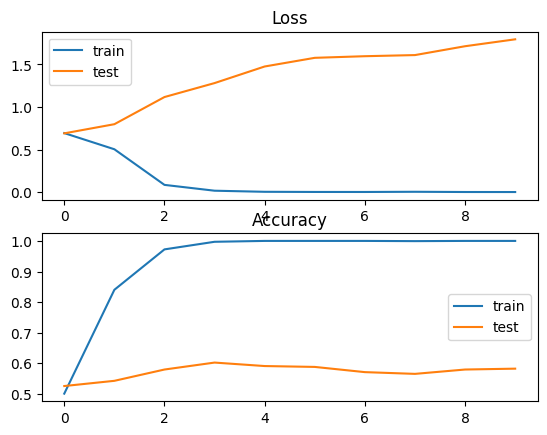

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()